In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def show(str, data):
    print(f"{str}: {data}")

# **<font color="yellow">Analysis</font>**

In [9]:
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
data = pd.read_csv(url)
data.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.000,1293.277,40.295,NYK,Knicks,68,1300.000,1306.723,H,L,0.640,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.000,1306.723,41.705,TRH,Huskies,66,1300.000,1293.277,A,W,0.360,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.000,1309.652,42.012,NYK,Knicks,47,1306.723,1297.071,H,W,0.631,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.723,1297.071,40.693,CHS,Stags,63,1300.000,1309.652,A,L,0.369,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.000,1279.619,38.864,WSC,Capitols,50,1300.000,1320.381,H,L,0.640,NaN


In [10]:
show("type", type(data))
show("rows", len(data))
show("shape", data.shape)

type: <class 'pandas.core.frame.DataFrame'>
rows: 126314
shape: (126314, 23)


In [8]:
# pd.get_option("display.max_columns")
pd.set_option("display.max_columns", None)
# pd.get_option("display.precision")
pd.set_option("display.precision", 3)
# pd.get_option("display.max_rows")

In [11]:
data.tail()    

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.415,1704.395,60.310,GSW,Warriors,103,1790.959,1809.979,H,L,0.547,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.979,1813.635,68.013,CLE,Cavaliers,91,1704.395,1700.739,H,W,0.766,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.395,1700.739,60.010,GSW,Warriors,104,1809.979,1813.635,A,L,0.234,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.739,1692.086,59.290,GSW,Warriors,105,1813.635,1822.288,H,L,0.481,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.635,1822.288,68.520,CLE,Cavaliers,97,1700.739,1692.086,A,W,0.519,NaN


# **<font color="yellow">Describe DATA</font>**

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [14]:
data.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.000,126314.0,126314.000,126314.000,126314.000,126314.000,126314.000,126314.000,126314.000,126314.000,126314.000,126314.000,126314.000
mean,31579.000,0.5,1988.200,43.534,0.064,102.730,1495.236,1495.236,41.708,102.730,1495.236,1495.236,0.500
std,18231.928,0.5,17.582,25.375,0.244,14.815,112.140,112.462,10.627,14.815,112.140,112.462,0.215
min,1.000,0.0,1947.000,1.000,0.000,0.000,1091.645,1085.774,10.153,0.000,1091.645,1085.774,0.020
25%,15790.000,0.0,1975.000,22.000,0.000,93.000,1417.238,1416.995,34.103,93.000,1417.238,1416.995,0.328
50%,31579.000,0.5,1990.000,43.000,0.000,103.000,1500.946,1500.954,42.113,103.000,1500.946,1500.954,0.500
75%,47368.000,1.0,2003.000,65.000,0.000,112.000,1576.060,1576.292,49.635,112.000,1576.060,1576.292,0.672
max,63157.000,1.0,2015.000,108.000,1.000,186.000,1853.104,1853.104,71.112,186.000,1853.104,1853.104,0.980


In [15]:
data.describe(include=object)

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,194611010TRH,NBA,4/13/2011,BOS,Lakers,BOS,Lakers,H,L,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


In [16]:
data.value_counts()

gameorder  game_id       lg_id  _iscopy  year_id  date_game   seasongame  is_playoffs  team_id  fran_id    pts  elo_i     elo_n     win_equiv  opp_id  opp_fran  opp_pts  opp_elo_i  opp_elo_n  game_location  game_result  forecast  notes                               
466        194801300BLB  NBA    0        1948     1/30/1948   31          0            BLB      Baltimore  95   1434.055  1448.501  46.407     WSC     Capitols  71       1469.347   1454.901   H              W            0.592     at Baltimore's Fifth Regiment Armory    1
11925      197103270VIR  ABA    1        1971     3/27/1971   81          0            CAR      Spirits    129  1296.972  1294.680  28.428     VIR     Squires   137      1490.495   1492.786   A              L            0.156     at Salem VA                             1
11938      197103300MIL  NBA    1        1971     3/30/1971   85          1            SFW      Warriors   102  1408.597  1406.870  37.481     MIL     Bucks     114      1695.807   1697.534

In [17]:
data["team_id"].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
INJ      60
PIT      60
DTF      60
TRH      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [18]:
data.loc[data["team_id"]=="BOS"].value_counts()

gameorder  game_id       lg_id  _iscopy  year_id  date_game   seasongame  is_playoffs  team_id  fran_id  pts  elo_i     elo_n     win_equiv  opp_id  opp_fran  opp_pts  opp_elo_i  opp_elo_n  game_location  game_result  forecast  notes                                                            
633        194811300BOS  NBA    0        1949     11/30/1948  13          0            BOS      Celtics  84   1368.974  1361.697  32.619     MNL     Lakers    94       1557.390   1564.667   H              L            0.375     at Chicago IL                                                        1
7012       196602070BOS  NBA    0        1966     2/7/1966    56          0            BOS      Celtics  112  1596.356  1598.874  51.264     SFW     Warriors  107      1467.829   1465.311   H              W            0.788     at Philadelphia PA                                                   1
7910       196712150BOS  NBA    0        1968     12/15/1967  27          0            BOS      Celtics  114

In [19]:
data["date_played"] = pd.to_datetime(data["date_game"])
data.drop("date_game", axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   seasongame     126314 non-null  int64         
 6   is_playoffs    126314 non-null  int64         
 7   team_id        126314 non-null  object        
 8   fran_id        126314 non-null  object        
 9   pts            126314 non-null  int64         
 10  elo_i          126314 non-null  float64       
 11  elo_n          126314 non-null  float64       
 12  win_equiv      126314 non-null  float64       
 13  opp_id         126314 non-null  object        
 14  opp_fran       126314 non-null  object        
 15  

In [20]:
data.loc[data["team_id"] == "BOS", "date_played"].min()
data.loc[data["team_id"] == "BOS", "date_played"].max()
data.loc[data["team_id"] == "BOS", "date_played"].agg(("min", "max"))

min   1946-11-02
max   2015-04-26
Name: date_played, dtype: datetime64[ns]

# **<font color="yellow">Queryind DATA</font>**

In [21]:
current_decade = data[data["year_id"] > 2010]
current_decade.shape

(12658, 23)

In [22]:
games_with_notes = data[data["notes"].notnull()]
games_with_notes.shape

(5424, 23)

In [23]:
ers = data[data["fran_id"].str.endswith("ers")]
ers.shape

(27797, 23)

In [24]:
data.head()

,gameorder,game_id,lg_id,_iscopy,year_id,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,date_played
0,1,194611010TRH,NBA,0,1947,1,0,TRH,Huskies,66,1300.000,1293.277,40.295,NYK,Knicks,68,1300.000,1306.723,H,L,0.640,NaN,1946-11-01
1,1,194611010TRH,NBA,1,1947,1,0,NYK,Knicks,68,1300.000,1306.723,41.705,TRH,Huskies,66,1300.000,1293.277,A,W,0.360,NaN,1946-11-01
2,2,194611020CHS,NBA,0,1947,1,0,CHS,Stags,63,1300.000,1309.652,42.012,NYK,Knicks,47,1306.723,1297.071,H,W,0.631,NaN,1946-11-02
3,2,194611020CHS,NBA,1,1947,2,0,NYK,Knicks,47,1306.723,1297.071,40.693,CHS,Stags,63,1300.000,1309.652,A,L,0.369,NaN,1946-11-02
4,3,194611020DTF,NBA,0,1947,1,0,DTF,Falcons,33,1300.000,1279.619,38.864,WSC,Capitols,50,1300.000,1320.381,H,L,0.640,NaN,1946-11-02


In [25]:
win_pts_over_100 = data[(data["_iscopy"] == 0) & (data["pts"] > 100) & (data["opp_pts"] > 100)]
win_pts_over_100.shape

(25754, 23)

# **<font color="yellow">Grouping & Aggregating data</font>**

In [26]:
points = data["pts"]
type(points)
points.sum()

12976235

In [27]:
fran_grp_pts = data.groupby("fran_id", sort=False)["pts"].sum()
fran_grp_pts, fran_grp_pts.shape

(fran_id
 Huskies           3995
 Knicks          582497
 Stags            20398
 Falcons           3797
 Capitols         22387
 Celtics         626484
 Steamrollers     12372
 Ironmen           3674
 Bombers          17793
 Rebels            4474
 Warriors        591224
 Baltimore        37219
 Jets              4482
 Pistons         572758
 Lakers          637444
 Kings           569245
 Hawks           567261
 Denver            4818
 Olympians        22864
 Redskins          5372
 Waterloo          4921
 Packers           6193
 Sixers          585891
 Wizards         474809
 Bulls           437269
 Thunder         437735
 Squires          91127
 Stars            84940
 Rockets         432504
 Colonels         94435
 Pacers          438288
 Nuggets         445780
 Spurs           453822
 Spirits          85874
 Sounds           75582
 Floridians       49568
 Nets            417809
 Condors          49642
 Bucks           418326
 Suns            437486
 Clippers        380523
 Cavali

In [28]:
lose_win_grp = data[(data["team_id"] == "BOS") & (data["year_id"] > 2010)].groupby(["year_id", "game_result", "game_location"])["game_id"].count()
lose_win_grp

year_id  game_result  game_location
2011     L            A                21
                      H                 9
         W            A                25
                      H                36
2012     L            A                25
                      H                11
         W            A                18
                      H                32
2013     L            A                29
                      H                15
         W            A                15
                      H                28
2014     L            A                32
                      H                25
         W            A                 9
                      H                16
2015     L            A                24
                      H                22
         W            A                19
                      H                21
Name: game_id, dtype: int64

In [29]:
data.head()

,gameorder,game_id,lg_id,_iscopy,year_id,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,date_played
0,1,194611010TRH,NBA,0,1947,1,0,TRH,Huskies,66,1300.000,1293.277,40.295,NYK,Knicks,68,1300.000,1306.723,H,L,0.640,NaN,1946-11-01
1,1,194611010TRH,NBA,1,1947,1,0,NYK,Knicks,68,1300.000,1306.723,41.705,TRH,Huskies,66,1300.000,1293.277,A,W,0.360,NaN,1946-11-01
2,2,194611020CHS,NBA,0,1947,1,0,CHS,Stags,63,1300.000,1309.652,42.012,NYK,Knicks,47,1306.723,1297.071,H,W,0.631,NaN,1946-11-02
3,2,194611020CHS,NBA,1,1947,2,0,NYK,Knicks,47,1306.723,1297.071,40.693,CHS,Stags,63,1300.000,1309.652,A,L,0.369,NaN,1946-11-02
4,3,194611020DTF,NBA,0,1947,1,0,DTF,Falcons,33,1300.000,1279.619,38.864,WSC,Capitols,50,1300.000,1320.381,H,L,0.640,NaN,1946-11-02


# **<font color="yellow">Manipulation</font>**

In [30]:
df = data.copy()
df.head()

,gameorder,game_id,lg_id,_iscopy,year_id,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,date_played
0,1,194611010TRH,NBA,0,1947,1,0,TRH,Huskies,66,1300.000,1293.277,40.295,NYK,Knicks,68,1300.000,1306.723,H,L,0.640,NaN,1946-11-01
1,1,194611010TRH,NBA,1,1947,1,0,NYK,Knicks,68,1300.000,1306.723,41.705,TRH,Huskies,66,1300.000,1293.277,A,W,0.360,NaN,1946-11-01
2,2,194611020CHS,NBA,0,1947,1,0,CHS,Stags,63,1300.000,1309.652,42.012,NYK,Knicks,47,1306.723,1297.071,H,W,0.631,NaN,1946-11-02
3,2,194611020CHS,NBA,1,1947,2,0,NYK,Knicks,47,1306.723,1297.071,40.693,CHS,Stags,63,1300.000,1309.652,A,L,0.369,NaN,1946-11-02
4,3,194611020DTF,NBA,0,1947,1,0,DTF,Falcons,33,1300.000,1279.619,38.864,WSC,Capitols,50,1300.000,1320.381,H,L,0.640,NaN,1946-11-02


In [31]:
df["difference"] = df["pts"] - df["opp_pts"]
df["difference"].max()

68

In [32]:
renamed_df = df.rename(columns={"game_result":"result", "game_location":"location"})
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   gameorder    126314 non-null  int64         
 1   game_id      126314 non-null  object        
 2   lg_id        126314 non-null  object        
 3   _iscopy      126314 non-null  int64         
 4   year_id      126314 non-null  int64         
 5   seasongame   126314 non-null  int64         
 6   is_playoffs  126314 non-null  int64         
 7   team_id      126314 non-null  object        
 8   fran_id      126314 non-null  object        
 9   pts          126314 non-null  int64         
 10  elo_i        126314 non-null  float64       
 11  elo_n        126314 non-null  float64       
 12  win_equiv    126314 non-null  float64       
 13  opp_id       126314 non-null  object        
 14  opp_fran     126314 non-null  object        
 15  opp_pts      126314 non-null  int6

In [33]:
renamed_df.columns

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'seasongame',
       'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i', 'elo_n',
       'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i', 'opp_elo_n',
       'location', 'result', 'forecast', 'notes', 'date_played', 'difference'],
      dtype='object')

In [35]:
elo_cols = [i for i in renamed_df.columns if "elo" in i]
renamed_df.drop(elo_cols, inplace=True, axis=1)
renamed_df.shape

(126314, 20)

# **<font color="yellow">Specifying data types</font>**

In [37]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   gameorder    126314 non-null  int64         
 1   game_id      126314 non-null  object        
 2   lg_id        126314 non-null  object        
 3   _iscopy      126314 non-null  int64         
 4   year_id      126314 non-null  int64         
 5   seasongame   126314 non-null  int64         
 6   is_playoffs  126314 non-null  int64         
 7   team_id      126314 non-null  object        
 8   fran_id      126314 non-null  object        
 9   pts          126314 non-null  int64         
 10  win_equiv    126314 non-null  float64       
 11  opp_id       126314 non-null  object        
 12  opp_fran     126314 non-null  object        
 13  opp_pts      126314 non-null  int64         
 14  location     126314 non-null  object        
 15  result       126314 non-null  obje

In [40]:
uniq_loc = renamed_df["location"].nunique()
uniq_loc
renamed_df["location"].value_counts()

H    63138
A    63138
N       38
Name: location, dtype: int64

In [42]:
renamed_df["location"] = pd.Categorical(renamed_df["location"])
renamed_df["location"].dtype

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

# **<font color="yellow">Cleaning Data</font>**

In [43]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   gameorder    126314 non-null  int64         
 1   game_id      126314 non-null  object        
 2   lg_id        126314 non-null  object        
 3   _iscopy      126314 non-null  int64         
 4   year_id      126314 non-null  int64         
 5   seasongame   126314 non-null  int64         
 6   is_playoffs  126314 non-null  int64         
 7   team_id      126314 non-null  object        
 8   fran_id      126314 non-null  object        
 9   pts          126314 non-null  int64         
 10  win_equiv    126314 non-null  float64       
 11  opp_id       126314 non-null  object        
 12  opp_fran     126314 non-null  object        
 13  opp_pts      126314 non-null  int64         
 14  location     126314 non-null  category      
 15  result       126314 non-null  obje

In [55]:
renamed_df["notes"].sample(10)

20733                NaN
53373                NaN
60136                NaN
94723                NaN
37722                NaN
4335                 NaN
7628      at New York NY
9576      at Syracuse NY
110246               NaN
1565                 NaN
Name: notes, dtype: object

In [58]:
renamed_df["notes"].fillna(value="no notes at all", inplace=True)
renamed_df["notes"].value_counts()
renamed_df["notes"].describe()

count              126314
unique                232
top       no notes at all
freq               120890
Name: notes, dtype: object

In [59]:
renamed_df.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,win_equiv,opp_pts,forecast,difference
count,126314.000,126314.0,126314.000,126314.000,126314.000,126314.000,126314.000,126314.000,126314.000,126314.000
mean,31579.000,0.5,1988.200,43.534,0.064,102.730,41.708,102.730,0.500,0.000
std,18231.928,0.5,17.582,25.375,0.244,14.815,10.627,14.815,0.215,13.375
min,1.000,0.0,1947.000,1.000,0.000,0.000,10.153,0.000,0.020,-68.000
25%,15790.000,0.0,1975.000,22.000,0.000,93.000,34.103,93.000,0.328,-9.000
50%,31579.000,0.5,1990.000,43.000,0.000,103.000,42.113,103.000,0.500,0.000
75%,47368.000,1.0,2003.000,65.000,0.000,112.000,49.635,112.000,0.672,9.000
max,63157.000,1.0,2015.000,108.000,1.000,186.000,71.112,186.000,0.980,68.000


In [60]:
data[data["pts"] == 0]

,gameorder,game_id,lg_id,_iscopy,year_id,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,date_played
26684,13343,197210260VIR,ABA,1,1973,7,0,DNR,Nuggets,0,1460.339,1457.446,40.409,VIR,Squires,2,1484.191,1487.083,A,L,0.329,at Richmond VA; forfeit to VIR,1972-10-26


In [62]:
data[(renamed_df["pts"] > renamed_df["opp_pts"]) & (renamed_df["result"] != "W")].empty
data[(renamed_df["pts"] < renamed_df["opp_pts"]) & (renamed_df["result"] != "L")].empty

True

# **<font color="yellow">Visualizing Data</font>**

<AxesSubplot:xlabel='year_id'>

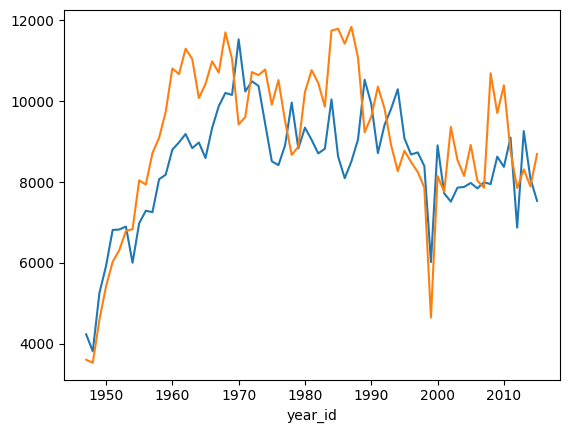

In [66]:
renamed_df[renamed_df["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()
renamed_df[renamed_df["team_id"] == "BOS"].groupby("year_id")["pts"].sum().plot()

<AxesSubplot:>

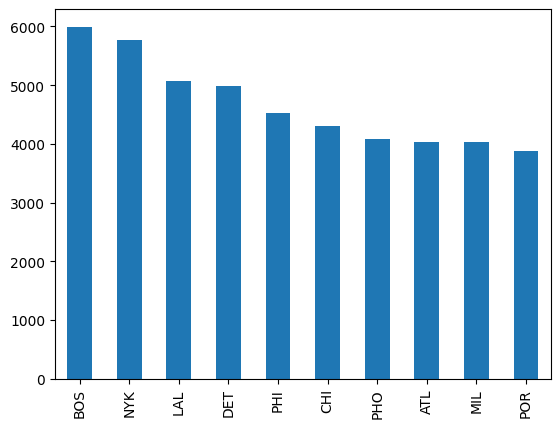

In [67]:
renamed_df["team_id"].value_counts().head(10).plot(kind="bar")